<a href="https://colab.research.google.com/github/aysudogangok/airline_passenger_satisfaction/blob/main/airline_passenger_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **BÖLÜM 1: VERİ SEÇİMİ**


**1.1. KULLANACAĞIMIZ DATANIN İNDİRİLMESİ**

In [ ]:
# uyarıları kapatıyorum
import warnings
warnings.filterwarnings("ignore")

# ilk olarak veri setini yüklüyoruz
import os
import pandas as pd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
df.head()

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**1.2. VERİ TİPLERİ**

In [ ]:
# Değişken isimleri ve veri tiplerini görelim

# mini not : veri tipleri bizi bazen yanıltabilir,
# bazı değişkenler sayısal görünümlü kategorik olabilir örneğin.
# yine de info methodu bize ön bilgi vermesi açısından kullanışlı.

df.dtypes.to_frame(name='Veri Tipi')

,Veri Tipi
Unnamed: 0,int64
id,int64
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64


# **BÖLÜM 2: EKSİK DEĞER ANALİZİ**

In [ ]:
# eksik değer var mı diye bakıyoruz

df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
# "arrival delay in minutes" isimli değişkende 310 eksik gözlem var,
# bu ilgili değişkendeki gözlemin yüzde kaçına denk geliyor diye bakıyoruz,
# ona göre silme ya da boş gözlem doldurma işlemine geçeceğiz.

missing_count = df["Arrival Delay in Minutes"].isnull().sum()
total_count = df.shape[0]
missing_ratio = (missing_count / total_count) * 100

print(f"Arrival Delay in Minutes sütunundaki eksik değer oranı: %{missing_ratio:.2f}")

Arrival Delay in Minutes sütunundaki eksik değer oranı: %0.30


In [ ]:
# yüzde 30 çok yüksek bir oran değil, eksik gözlemleri silmek istemiyorum
# bu bana bilgi kaybı yaratırdı modelleme yapacak olsaydım
# doldurmayı tercih ediyorum. ama önce bir betimsel analizine bakmamız gerekiyor

print(df["Arrival Delay in Minutes"].describe().round(2))

count    103594.00
mean         15.18
std          38.70
min           0.00
25%           0.00
50%           0.00
75%          13.00
max        1584.00
Name: Arrival Delay in Minutes, dtype: float64


**sağa çarpık (right-skewed) bir dağılım var.** Çünkü:

- ortalama (15.18) medyandan (0) çok daha yüksek.
- minimum = 0, medyan = 0 ama maksimum = 1584 ;
- birkaç aşırı büyük değer, ortalamayı yukarı çekmiş.
- bu, bazı uçuşların çok uzun geciktiğini, ancak büyük çoğunluğun hiç gecikmediğini gösteriyor.
- %50’den fazlası 0 dakika gecikmiş (medyan 0).

In [ ]:
# değişkenin dağılımı çarpık olduğu için medyan ile doldurmak daha mantıklı olacaktır.

df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

# eksik değer var mı diye tekrar kontrol edelim:

bool(df.isnull().values.any())

False

# **BÖLÜM 3: İSTATİSTİKSEL ÖZET VE AYKIRI DEĞER**

In [ ]:
# df.describe().shape[1] --- 20
# df.shape[1] --- 25

#5 sutun kategorik ve 18  sutun numeric. (unnamed ve id'yi hariç tuttum)

**3.1. SAYISAL DEĞİŞKENLER**

In [ ]:
df.describe().round(1)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0
mean,51951.5,64924.2,39.4,1189.4,2.7,3.1,2.8,3.0,3.2,3.3,3.4,3.4,3.4,3.4,3.6,3.3,3.6,3.3,14.8,15.1
std,29994.6,37463.8,15.1,997.1,1.3,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.2,38.6
min,0.0,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,25975.8,32533.8,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,51951.5,64856.5,40.0,843.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,77927.2,97368.2,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,103903.0,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


***NOT***

* ben burada değişkenleri gruplandırmayı tercih ettim, bu şekilde yorumlanabilirliğinin daha kolay olabileceğini düşündüm.
* önce tabi ki iki kategorimiz var; sayısal değişkenler ve kategorik değişkenler
* sayısal değişkenlerde 7 farklı toplulaştırmaya gittim; yolculara dair bilgiler; genel hizmetler; uçak içi hizmetler; uçak içi konfor;
    online işlemler; zamanlama; diğer
* kategorik değişkenlerde ise 2 farklı grup oluştu; (yine) yolculara dair bilgiler; (ve burada) bağımlı değişken

----------------------------------------------------------------

**Yolculara Dair Bilgiler**

Age;
- ortalama ve medyan oldukça yakın, dağılım dengeli denebilir.
- ayrıca 27 ile 50 yaş arasındaki yolcu sayısı görece fazla.

----------------------------------------------------------------

**Genel Hizmetler**

Baggage handling;
- bagaj hizmetinde yüksek memnuniyet kaydedilmiş.

Checkin service;
- ortalama düzeyde memnuniyet.

Gate location;
- Orta düzey memnuniyet.


----------------------------------------------------------------

**Uçak içi Hizmetler**

Inflight wifi service;
- yolcular bu hizmete ortalama puan vermişler genel olarak (3 puan).
- Food and drink;
- Memnuniyet düzeyi genellikle ortalama.
  
Inflight entertainment;
- yine uçak içi eğlence hizmetleri görece iyi puanlanmış.

On-board service;
- uçuş sırası genel hizmet olumlu.

Inflight service;
- uçuş içi servis memnuniyete yüksek.

Cleanliness;
- Ortalama bir memnuniyet var temizlik için


----------------------------------------------------------------

**Uçak İçi Konfor**

Seat comfort;
- ortalaması 3.4 ve medyan 4, memnuniyet eğilimi görece yüksek

Leg room service;
- diz mesafesi büyük ölçüde olumlu.

----------------------------------------------------------------

**Online İşlemler**

Online boarding;
- ortalama memnuniyet.
  
Ease of Online booking;
- genel memnuniyet yine orta düzeyde.

----------------------------------------------------------------

**Zamanlama**


Departure/Arrival time convenient;
- Zamanlama konusunda ortalama memnuniyet hakim.

Departure Delay in Minutes;
- Oldukça çarpık bir dağılım var. Bazı uçuşlarda çok yüksek gecikmeler yaşanmış.

Arrival Delay in Minutes;
- Yine varışta da bazı uçuşlar çok fazla rotarlı olmuş.

----------------------------------------------------------------

**Diğer**

Flight Distance;
- Ortalama medyandan yüksek, sağa çarpık bir dağılım söz konusu.
- Bazı çok uzun mesafeli uçuşlar ortalamayı yükseltmiş fakat çoğu uçuş orta-kısa mesafeli denebilir (medyan daha düşük)

----------------------------------------------------------------

**GÖRSELLEŞTİRELİM**

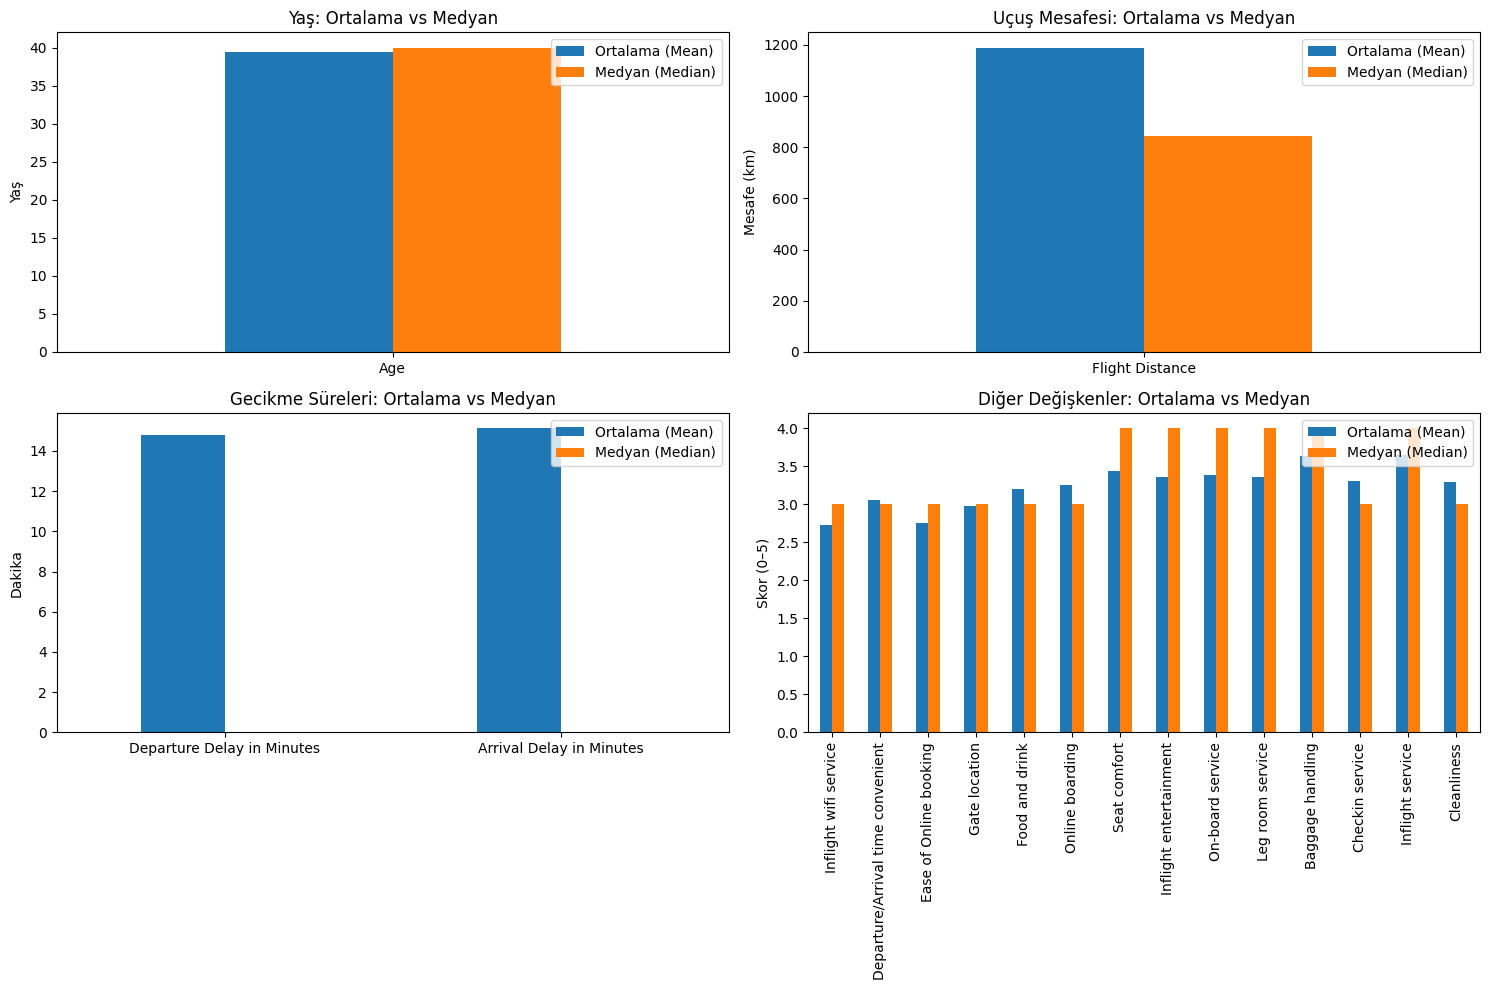

In [ ]:
# değişken değerlerinin scalaları farklı olduğu için,
# dört ayrı şekile bölüyorum mean ve median görsellerini

import pandas as pd
import matplotlib.pyplot as plt

# Özet tablo
columns_to_plot = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

summary_df = pd.DataFrame({
    'Ortalama (Mean)': df[columns_to_plot].mean(),
    'Medyan (Median)' : df[columns_to_plot].median()
})

# Renkleri mavi ve turuncu olarak belirliyorum
colors = ['#1f77b4', '#ff7f0e']

# Subplot'ları hazırlayalım
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# 1. Grafik - Yaş
summary_df.loc[['Age']].plot(kind='bar', ax=axes[0,0], color=colors)
axes[0,0].set_title('Yaş: Ortalama vs Medyan')
axes[0,0].set_ylabel('Yaş')
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].legend(loc='upper right')

# 2. Grafik - Uçuş Mesafesi
summary_df.loc[['Flight Distance']].plot(kind='bar', ax=axes[0,1], color=colors)
axes[0,1].set_title('Uçuş Mesafesi: Ortalama vs Medyan')
axes[0,1].set_ylabel('Mesafe (km)')
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(loc='upper right')

# 3. Grafik - Gecikmeler
summary_df.loc[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].plot(
    kind='bar', ax=axes[1,0], color=colors
)
axes[1,0].set_title('Gecikme Süreleri: Ortalama vs Medyan')
axes[1,0].set_ylabel('Dakika')
axes[1,0].tick_params(axis='x', rotation=0)
axes[1,0].legend(loc='upper right')

# 4. Grafik - Diğer Hizmetler
summary_df.drop([
    'Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'
]).plot(kind='bar', ax=axes[1,1], color=colors)
axes[1,1].set_title('Diğer Değişkenler: Ortalama vs Medyan')
axes[1,1].set_ylabel('Skor (0–5)')
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].legend(loc='upper right')


plt.tight_layout()
plt.show()

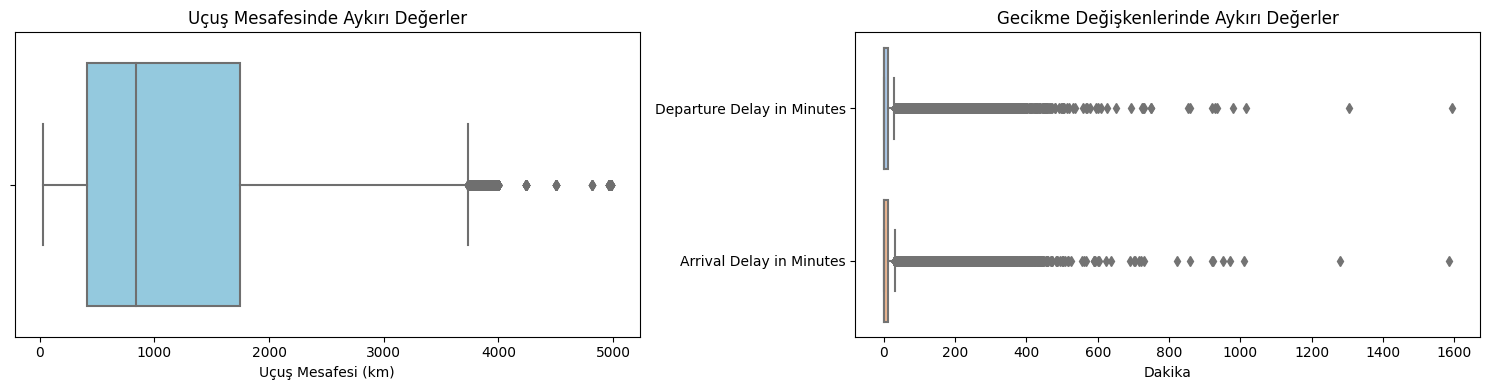

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # 1 satır, 2 sütun

# 1. Grafik: Flight Distance boxplot
sns.boxplot(ax=axes[0], x=df["Flight Distance"], color="skyblue")
axes[0].set_xlabel("Uçuş Mesafesi (km)")
axes[0].set_title("Uçuş Mesafesinde Aykırı Değerler")

# 2. Grafik: Departure & Arrival Delay boxplot
sns.boxplot(ax=axes[1], data=df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']], orient="h", palette="pastel")
axes[1].set_xlabel("Dakika")
axes[1].set_title("Gecikme Değişkenlerinde Aykırı Değerler")

plt.tight_layout()
plt.show()

**Önce box-plot'u bir okuyalım (ilk görsel için):**

1. kutu (Box): 25. ve 75. yüzdelikler arasında kalan uçuş mesafeleri.
2. kutunun ortasındaki kalın çizgi = medyan (Q2), yaklaşık 850 km.
3. alt ve üst çizgiler (whiskers). örneğin whisker üst sınırı, yaklaşık 3800 km civarında.
4. bunun üstündeki değerler aykırı (outlier) kabul ediliyor.
5. daire şeklindeki noktalar: aykırı değerler. örneğin 4000–5000 km arası birçok uçuş mesafesi bu sınırların dışında.

**İkinci görsel için de aykırı değerler söz konusu:**

Görüldüğü gibi sağ çarpıklık var (ortalama medyandan büyük)


**İki görseli kıyasladığımızda:**

- uçuş mesafesi değişkeninde hem çarpıklık derecesi daha düşük,
  hem de aykırı değerlerin etkisi diğer iki gecikme değişkenine
  kıyasla daha az diyebiliriz.
- Gecikme süreleri, hem sayıca daha fazla aykırı değer içeriyor hem de uç değerlere çok açık.

**3.2. KATEGORİK DEĞİŞKENLER**

In [ ]:
# Tüm sütunlar için istatistiksel özet (kategorik + numerik)
desc_all = df.describe(include='all').round(2).fillna("-")

# Sadece sayısal sütunlar için özet
desc_num = df.describe().round(2)

# Kategorik sütunların özetini almak için sayısal sütunları çıkaralım
desc_categoric = desc_all.drop(columns=desc_num.columns)

from IPython.display import display
display(desc_categoric)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879
mean,-,-,-,-,-
std,-,-,-,-,-
min,-,-,-,-,-
25%,-,-,-,-,-
50%,-,-,-,-,-
75%,-,-,-,-,-


----------------------------------------------------------------

**Yolculara Dair Bilgiler**

Gender;

- toplam yolcu sayısının %50.7’si kadın

Customer Type;

- Burada iki kategori var: Loyal (sadık) ve Disloyal (sadık olmayan)
- sadık müşteriler %81.7 oranında, oldukça yüksek

Type of Travel;

- Yine iki kategori var: Business (iş) ve Personal (kişisel)
- yolcuların %69’u iş seyahati yapıyor

Class;
- üç kategori var: business, eco ve eco plus
- yolcuların %48’i business class ile uçmuş

----------------------------------------------------------------

**Bağımlı değişken** (model kuracak olsaydık)

Satisfaction;

- İki kategori var: neutral or dissatisfies ve satisfied
- yolcuların %56.7'si memnun değil.

----------------------------------------------------------------

**GÖRSELLEŞTİRELİM**

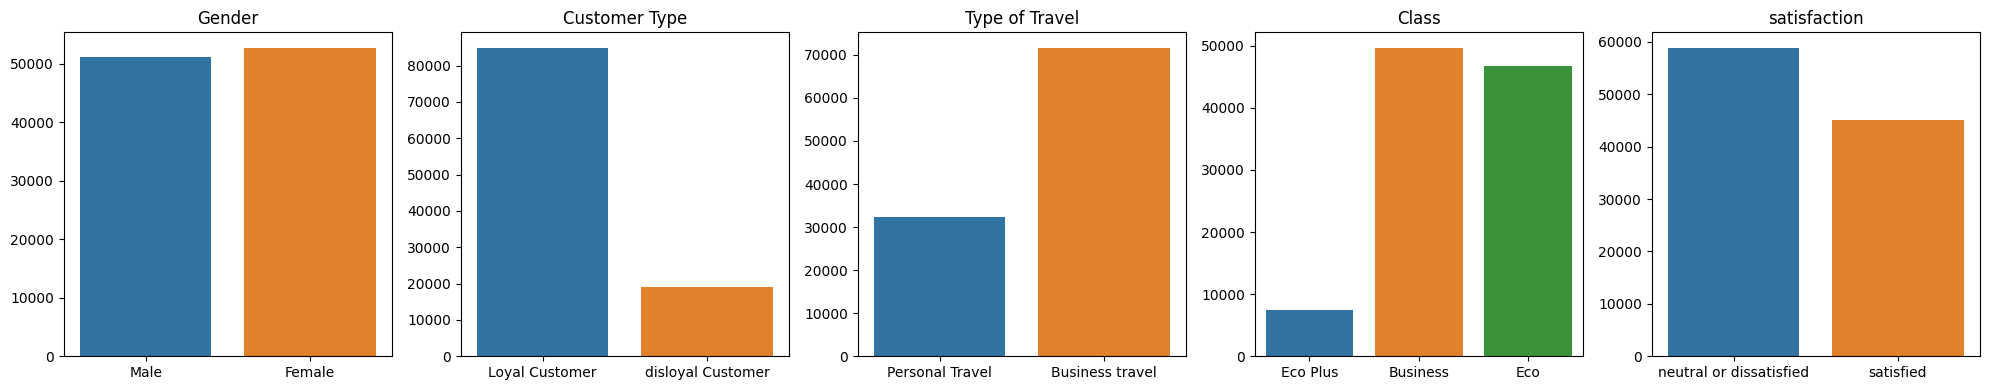

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Kategorik değişken isimleri
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

plt.figure(figsize=(20, 4))

# Her değişken için subplot
for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# **BÖLÜM 4: DEĞİŞKENLER ARASI İLİŞKİLERİN GRAFİK YARDIMIYLA İNCELENMESİ**

**ÖNCE BİR KORELASYONA BAKALIM**

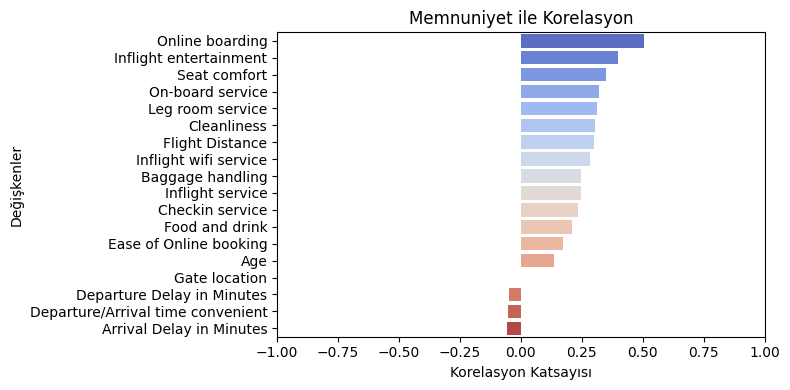

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# satisfaction_binary oluşturalım
df['satisfaction_binary'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Sayısal sütunlardan id ve Unnamed 0 dışındakileri alıyoruz
numeric_cols = df.select_dtypes(include='number').columns.drop(['id', 'Unnamed: 0'])

# satisfaction_binary ile korelasyonları hesapla ve sırala
correlation = df[numeric_cols].corr()['satisfaction_binary'].drop('satisfaction_binary')
correlation_sorted = correlation.sort_values(ascending=False)

# Barplot ile görselleştir
plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')
plt.title("Memnuniyet ile Korelasyon")
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Değişkenler")
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

**GRAFİK 1: Yolculara Dair Bilgiler ile Memnuniyet**

Yolculara dair bilgiler yukarıda verilmişti; age; gender; customer type; type of travel; class

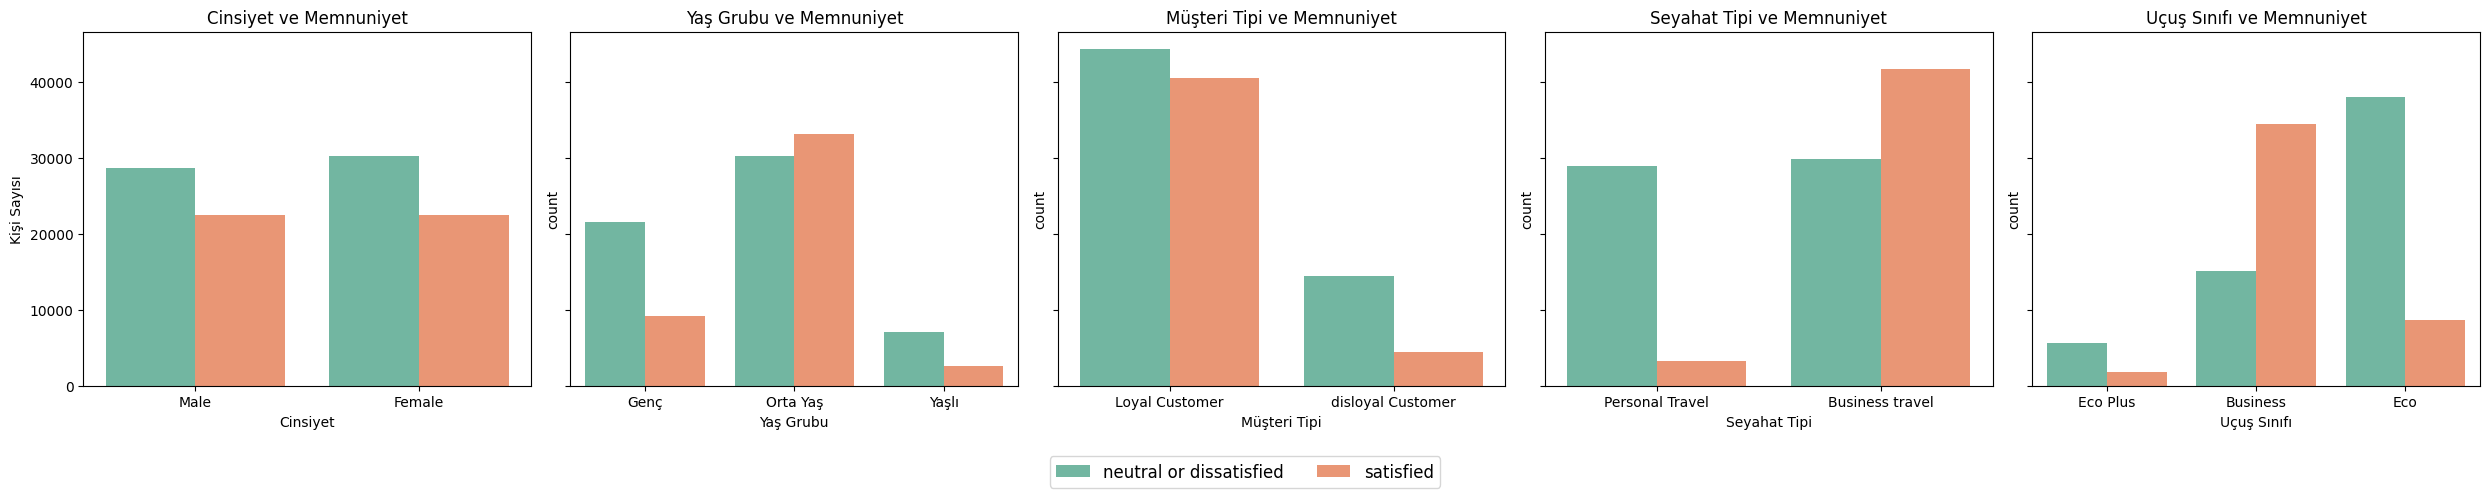

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Yaş değişkenini kategorik formata getirelim:

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 29, 59, 100], labels=['Genç', 'Orta Yaş', 'Yaşlı'])

fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

# 1. Cinsiyet
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=axes[0], palette="Set2")
axes[0].set_title('Cinsiyet ve Memnuniyet')
axes[0].set_xlabel('Cinsiyet')
axes[0].set_ylabel('Kişi Sayısı')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend_.remove()

# 2. Yaş Grubu
sns.countplot(data=df, x='AgeGroup', hue='satisfaction', ax=axes[1], palette="Set2")
axes[1].set_title('Yaş Grubu ve Memnuniyet')
axes[1].set_xlabel('Yaş Grubu')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend_.remove()

# 3. Customer Type
sns.countplot(data=df, x='Customer Type', hue='satisfaction', ax=axes[2], palette="Set2")
axes[2].set_title('Müşteri Tipi ve Memnuniyet')
axes[2].set_xlabel('Müşteri Tipi')
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend_.remove()

# 4. Type of Travel
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=axes[3], palette="Set2")
axes[3].set_title('Seyahat Tipi ve Memnuniyet')
axes[3].set_xlabel('Seyahat Tipi')
axes[3].tick_params(axis='x', rotation=0)
axes[3].legend_.remove()

# 5. Class
sns.countplot(data=df, x='Class', hue='satisfaction', ax=axes[4], palette="Set2")
axes[4].set_title('Uçuş Sınıfı ve Memnuniyet')
axes[4].set_xlabel('Uçuş Sınıfı')
axes[4].tick_params(axis='x', rotation=0)
axes[4].legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

# **BU ÜÇ GÖRSELİ TOPARLAYALIM**

ilk görsele göre;

Kadın erkek sayısında ciddi bir fark yok.
Sadık müşteri sayısı çok yüksek. Bu firmanın başarsını gösteriyor.
Müşteriler genellikle iş seyahati yapıyor.
Business uçuş sayısı yüksek hemen arkasından Eco sınıf geliyor. Eco-plus dikkate alınmayacak ölçüde düşük.
Müşteri memnuniyetsizliği yüksek. Hem sadık müşteri yüksek hem de müşteri memnuniyetsizliği yüksek (buna bir bakmak lazım!)

ikinci görsele göre;

Memnuniyeti en çok etkileyen ilk 5 değişken; online boarding, inflight entertainment, seat comfort, on-board service, leg room service

üçüncü görsele göre;

Kadın ve erkek yaklaşık olarak eşit derece memnun ve memnuniyetsiz. Burada dikkate değer bir durum yok.

yaş gurubu orta yaşta yoğunlaşmış ve burada menun yolcular ile memnuniyetsiz yolcular sayısı birbirine yakın. Hemen ikinci yoğunluk genç grupta ve burada memnuniyetsiz müşteri sayısı baskın. Bu da kayda değer bir durum olabilir.

Müşteri tipine bakıldığında, sadık müşteri sayısı çok yüksek ve memnun olmayan sadık müşteri sayısı görece fazla. Bu çok önemli bir gösterge.

Seyahat tipi genellikle iş seyahati şeklinde ve burada memnuniyet baskın.

Uçuş sınıfında da Business ve Eco baskın, business sınıfta memnuniyet oranı çok yüksek iken Eco da memnuniyetsizlik yüksek.

O zaman özetle, **genç gurup (belki orta yaş grup), Eco yolcular, kişisel seyahat yapan müşteriler neden memnuniyetsiz** sorusu sorulabilir.

İkincisi, müşteri sadakati yüksek, ama sadık müşteri memnuniyetsizliği de yüksek. Yani aslında burada çelişki söz konusu.
Ya cevaplar rastgele verildi, ya da memnuniyetsizliği yaratmasına karşın bu firma fiyat-performans olduğu için
memnuniyetsizlik yaratan durumlara rağmen tercih ediliyor.

Yine de karlılık artışı için, yukarıdaki üç grubun memnun olmama durumları irdelenmeli, bu sadık olmayan müşterilerin de sadık müşterilere dahil edilebilmesi için önemli bir inceleme olacaktır.

- **soru 1: iş seyahati yapan yolcular (yüksek orandaydı) hangi sınıfta uçuyor?**
- **soru 2 : kişisel seyahat yapan yolcular hangi sınfıta uçuyor?**
- **soru 3: memnuniyet ile ilişkileri nasıl?**



**GRAFİK 2: Seyahat Türü ve Uçuş Sınıfına Göre Memnuniyet Dağılımı**

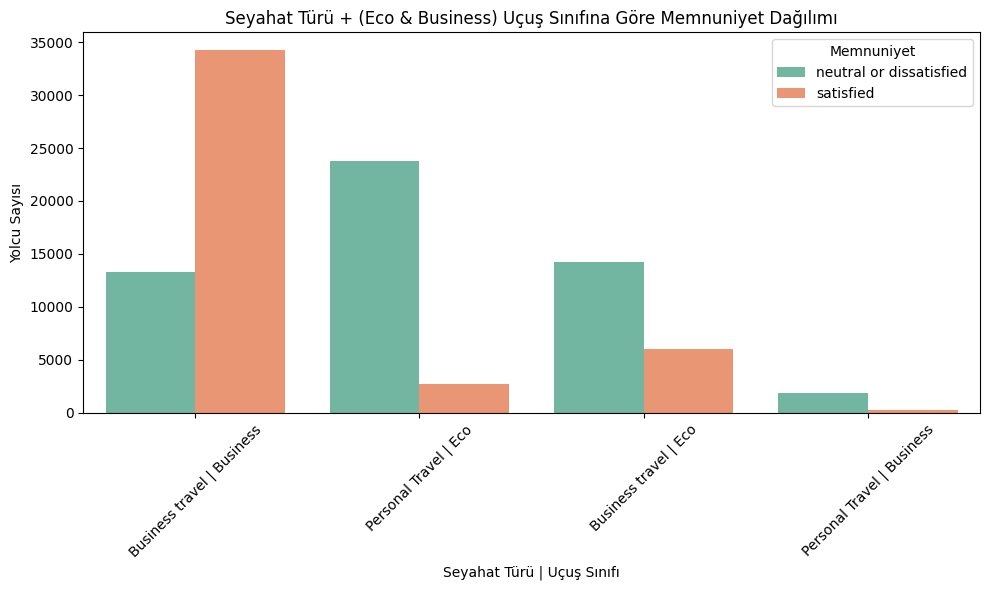

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece Eco ve Business sınıfları
df_filtered = df[df['Class'].isin(['Eco', 'Business'])].copy()

# Yeni bir sütun oluşturalım: "Type of Travel | Class"
df_filtered['Travel_Class'] = df_filtered['Type of Travel'] + ' | ' + df_filtered['Class']

# Grafik
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_filtered,
    x='Travel_Class',
    hue='satisfaction',
    palette='Set2'
)
plt.title('Seyahat Türü ve Uçuş Sınıfına Göre Memnuniyet Dağılımı')
plt.xlabel('Seyahat Türü | Uçuş Sınıfı')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Memnuniyet')
plt.tight_layout()
plt.show()

**ÖNEMLİ**

yukarıda görüldüğü gibi; iş seyahati yapanlar çoğunluk business class da uçuyor, fakat az da olsa eco'da uçanlar da var.
diğer taraftan, kişisel amaçlı seyahat eden insanların neredeyse tamamı eco uçuyor.

ve yukarıdaki görsel teyit ediyor ki, kişisel amaçlı seyahat eden müşteriler memnun değil uçuşlarından.
yine, iş seyahati amaçlı eco'da uçan yolcuların da çoğu uçuşundan memnun değil.

O halde odaklanmamız gereken müşteri kitlesinin artık eco sınıfında uçanlar olduğunu ve özellikle de kişise amaçlı seyahat ettiklerini biliyoruz.

Peki başka bir soru; gerçekten de bu insanlar sadık müşteri mi?

**GRAFİK 3: Eco Sınıfı Yolcuların Seyahat Amacına Göre Sadakat Dağılımı**

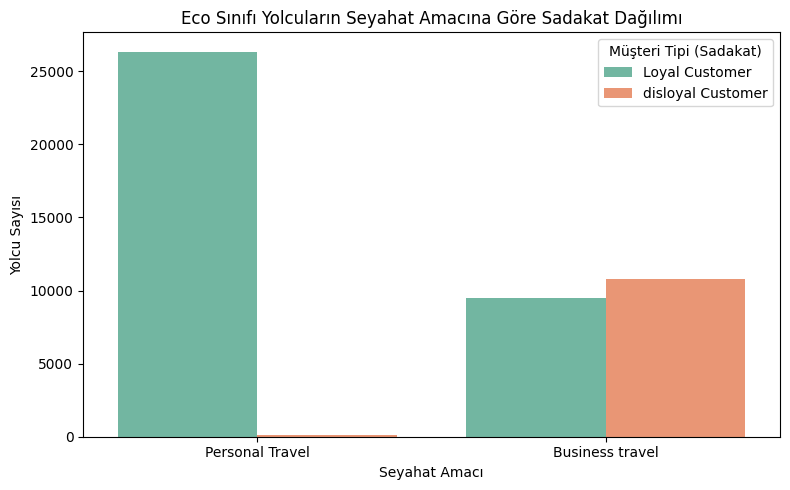

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece 'Eco' sınıfındaki yolcular
df_eco = df[df['Class'] == 'Eco'].copy()

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_eco,
    x='Type of Travel',
    hue='Customer Type',
    palette='Set2'
)

plt.title("Eco Sınıfı Yolcuların Seyahat Amacına Göre Sadakat Dağılımı")
plt.xlabel("Seyahat Amacı")
plt.ylabel("Yolcu Sayısı")
plt.legend(title='Müşteri Tipi (Sadakat)')
plt.tight_layout()
plt.show()

**ÖNEMLİ**

iş seyahati amaçlı eko sınıfta uçan insanlar sadakat durumu hakkında ayırt edici birşey söylememekle beraber, eco sınıfta uçan kişisel amaçlı seyahat eden yolcular son derece sadık.

yani yine aynı soru; personal seyahat yapan eco yolcuları hem memnuniyetsiz hem sadık diyebilir miyiz?

O zaman iki krtik durum var;

1. **eco sınıfındaki sadık müşteriler** neden memnun değil?
2. müşteri portföyünün büyük çoğunluğunu oluşturan **business amaçlı eco sınıfında** seyahat eden insanlar neden memnun değil ve sadık değil? -ki bence asıl buraya bakmalıyız.



**üç soruyu da toplulaştırılmış değişkenler altında inceleyeceğiz, gerekirse ayrıntısına bakacağız.**

(daha önce yukarıda bunlar incelenmişti betimsel analiz bağlamında)

**Genel Hizmetler**

Baggage handling;
Checkin service;
Gate location

----------------------------------------------------------------

**Uçak içi Hizmetler**

Inflight wifi service;
Inflight entertainment;
On-board service;
Inflight service;
Cleanliness

----------------------------------------------------------------

**Uçak İçi Konfor**

Seat comfort;
Leg room service

----------------------------------------------------------------

**Online İşlemler**

Online boarding;
Ease of Online booking

----------------------------------------------------------------

**Zamanlama**

Departure/Arrival time convenient;
Departure Delay in Minutes;
Arrival Delay in Minutes








# **Yukarıdaki iki soru öncesinde; eco sınıfındaki genel sorun ne?**

**GRAFİK 4: Eco Sınıfındaki Genel Hizmet Sorunları — Ortalama Skorlar**

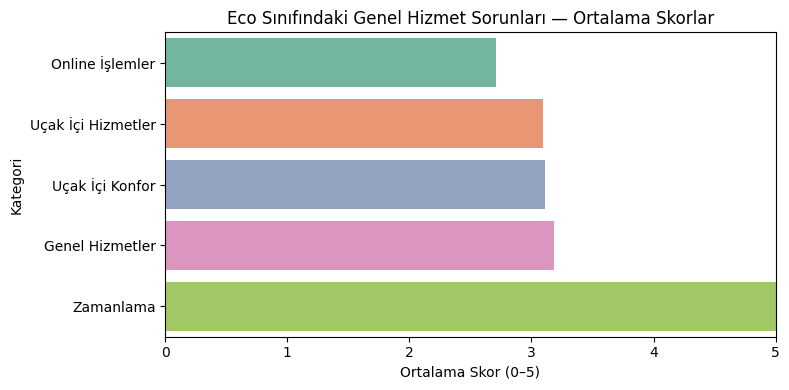

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorilere göre sütunlar
general_cols  = ['Baggage handling', 'Checkin service', 'Gate location']
inflight_cols = ['Inflight wifi service', 'Inflight entertainment',
                 'On-board service', 'Inflight service', 'Cleanliness']
comfort_cols  = ['Seat comfort', 'Leg room service']
online_cols   = ['Online boarding', 'Ease of Online booking']
timing_cols   = ['Departure/Arrival time convenient',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Sadece Eco sınıfındaki yolcular
eco_passengers = df[df['Class'] == 'Eco'].copy()

# Ortalama skorları kategori bazında hesaplayalım
eco_means = pd.Series({
    'Genel Hizmetler'   : eco_passengers[general_cols].mean(axis=1).mean(),
    'Uçak İçi Hizmetler': eco_passengers[inflight_cols].mean(axis=1).mean(),
    'Uçak İçi Konfor'   : eco_passengers[comfort_cols].mean(axis=1).mean(),
    'Online İşlemler'   : eco_passengers[online_cols].mean(axis=1).mean(),
    'Zamanlama'         : eco_passengers[timing_cols].mean(axis=1).mean()
}).sort_values()

# Görselleştirelim
plt.figure(figsize=(8, 4))
sns.barplot(x=eco_means.values, y=eco_means.index, palette="Set2")
plt.title("Eco Sınıfındaki Genel Hizmet Sorunları — Ortalama Skorlar")
plt.xlabel("Ortalama Skor (0–5)")
plt.ylabel("Kategori")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

# **ŞİMDİ ASIL İKİ SORUYU SORABİLİRİZ**

# **SORU 1: Eco sınıfındaki sadık müşteriler neden memnun değil?**

**GRAFİK 5: Eco Sınıfındaki Memnun Olmayan Sadık Müşteriler – Ortalama Kategori Puanları**

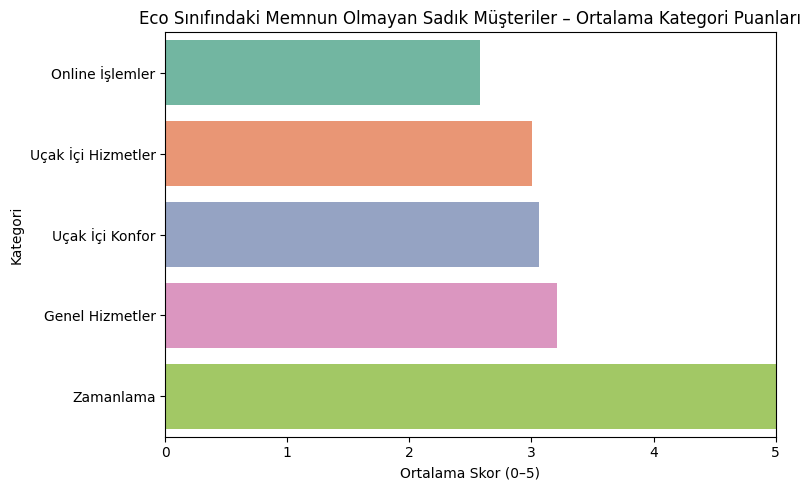

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) ECO + LOYAL + memnun OLMAYAN yolcuları filtreleyelim
eco_loyal_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Customer Type'] == 'Loyal Customer') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

# 2) Kategori listelerini tanımlayalım
general_cols  = ['Baggage handling', 'Checkin service', 'Gate location']
inflight_cols = ['Inflight wifi service', 'Inflight entertainment',
                 'On-board service', 'Inflight service', 'Cleanliness']
comfort_cols  = ['Seat comfort', 'Leg room service']
online_cols   = ['Online boarding', 'Ease of Online booking']
timing_cols   = ['Departure/Arrival time convenient',
                 'Departure Delay in Minutes',
                 'Arrival Delay in Minutes']

# 3) Ortalama skorları hesaplayalım
category_means = pd.Series({
    'Genel Hizmetler'  : eco_loyal_unhappy[general_cols].mean(axis=1).mean(),
    'Uçak İçi Hizmetler': eco_loyal_unhappy[inflight_cols].mean(axis=1).mean(),
    'Uçak İçi Konfor'  : eco_loyal_unhappy[comfort_cols].mean(axis=1).mean(),
    'Online İşlemler'  : eco_loyal_unhappy[online_cols].mean(axis=1).mean(),
    'Zamanlama'        : eco_loyal_unhappy[timing_cols].mean(axis=1).mean()
}).sort_values()   # küçükten büyüğe sıralansın

# 4) Görselleştirelim
plt.figure(figsize=(8, 5))
sns.barplot(x=category_means.values, y=category_means.index, palette="Set2")
plt.title("Eco Sınıfındaki Memnun Olmayan Sadık Müşteriler – Ortalama Kategori Puanları")
plt.xlabel("Ortalama Skor (0–5)")
plt.ylabel("Kategori")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

* **GRAFİK 6: Eco Sınıfındaki Memnun Olan Sadık Müşteriler – Online İşlemler Ortalama Puanları**
  
* **GRAFİK 7: Eco Sınıfındaki Memnun Olmayan Sadık Müşteriler – Uçak İçi Hizmetler Ortalama Puanları**


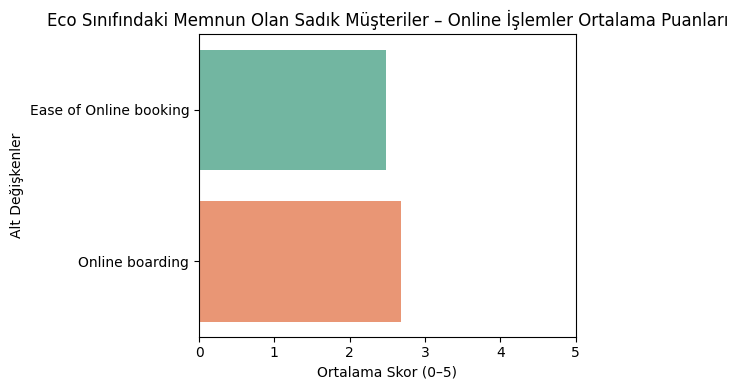

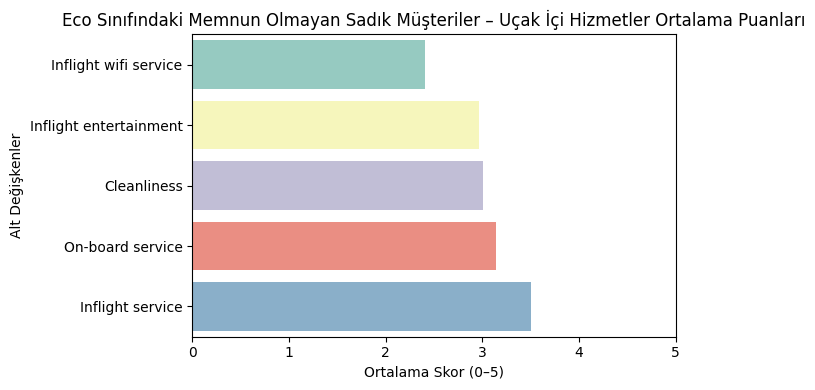

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------- #
# 1) Filtre: Eco + Loyal Customer
# -------------------------------------------------------- #
eco_loyal_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Customer Type'] == 'Loyal Customer') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

# -------------------------------------------------------- #
# 2) Alt değişken listeleri
# -------------------------------------------------------- #
online_cols   = ['Online boarding', 'Ease of Online booking']
inflight_cols = ['Inflight wifi service', 'Inflight entertainment',
                 'On-board service', 'Inflight service', 'Cleanliness']

# -------------------------------------------------------- #
# 3) Ortalama puanları hesaplayalım
# -------------------------------------------------------- #
online_means   = eco_loyal_unhappy[online_cols].mean().sort_values()
inflight_means = eco_loyal_unhappy[inflight_cols].mean().sort_values()

# -------------------------------------------------------- #
# 4) Grafik – Online İşlemler
# -------------------------------------------------------- #
plt.figure(figsize=(6, 4))
sns.barplot(x=online_means.values, y=online_means.index, palette='Set2')
plt.title("Eco Sınıfındaki Memnun Olan Sadık Müşteriler – Online İşlemler Ortalama Puanları")
plt.xlabel("Ortalama Skor (0–5)")
plt.ylabel("Alt Değişkenler")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

# -------------------------------------------------------- #
# 5) Grafik – Uçak İçi Hizmetler
# -------------------------------------------------------- #
plt.figure(figsize=(7, 4))
sns.barplot(x=inflight_means.values, y=inflight_means.index, palette='Set3')
plt.title("Eco Sınıfındaki Memnun Olmayan Sadık Müşteriler – Uçak İçi Hizmetler Ortalama Puanları")
plt.xlabel("Ortalama Skor (0–5)")
plt.ylabel("Alt Değişkenler")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

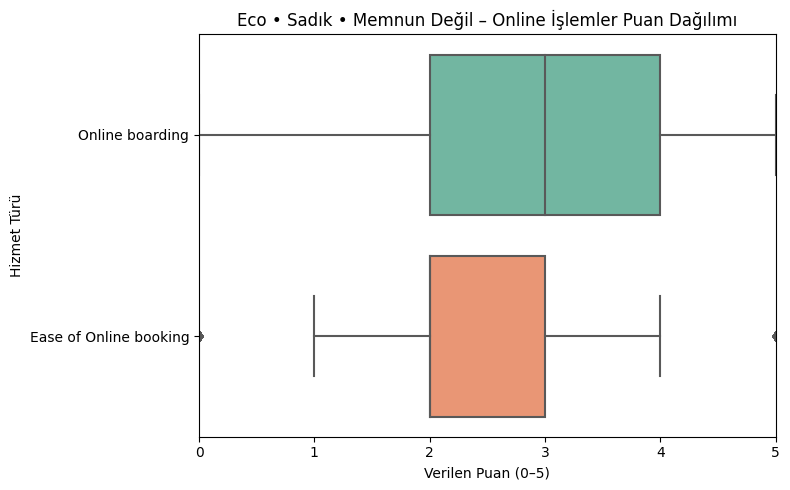

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtre: Eco + Loyal + Memnun değil
eco_loyal_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Customer Type'] == 'Loyal Customer') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

# İlgili sütunlar
online_cols = ['Online boarding', 'Ease of Online booking']

# Uzun formata çevir (her satır: kişi + hizmet + puan)
online_long = eco_loyal_unhappy[online_cols].melt(var_name='Hizmet', value_name='Puan')

# Boxplot çizimi
plt.figure(figsize=(8, 5))
sns.boxplot(data=online_long, x='Puan', y='Hizmet', palette='Set2')
plt.title("Eco • Sadık • Memnun Değil – Online İşlemler Puan Dağılımı")
plt.xlabel("Verilen Puan (0–5)")
plt.ylabel("Hizmet Türü")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

 **ÖNEMLİ**

 # **SORU 2: business amaçlı eco sınıfında** seyahat eden insanlar neden memnun değil ve sadık değil?

 iki soru çıkıyor buradan :



2.1. **business amaçlı eco sınıfında** seyahat eden insanlar neden memnun değil?

2.2. **business amaçlı eco sınıfında** seyahat eden ve sadık olmayan insanlar neden memnun değil?

* **GRAFİK 8: Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan Müşteriler —
Kategori Ortalamaları**

* **GRAFİK 9: Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olnmayan ve Sadık Olmayan Müşteriler — Kategori Ortalamaları**

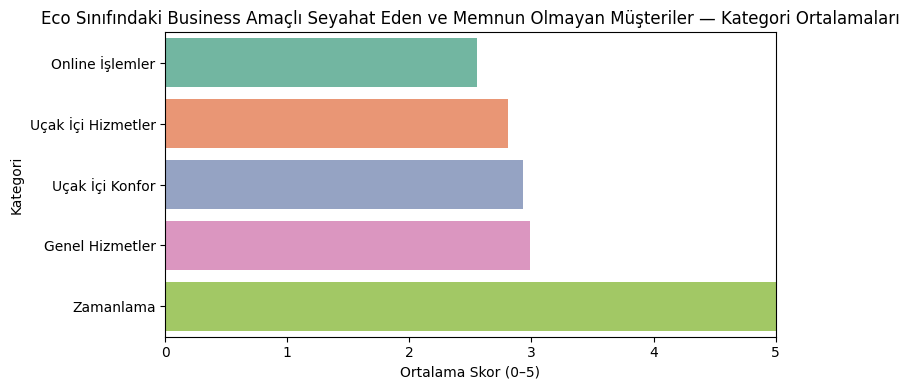

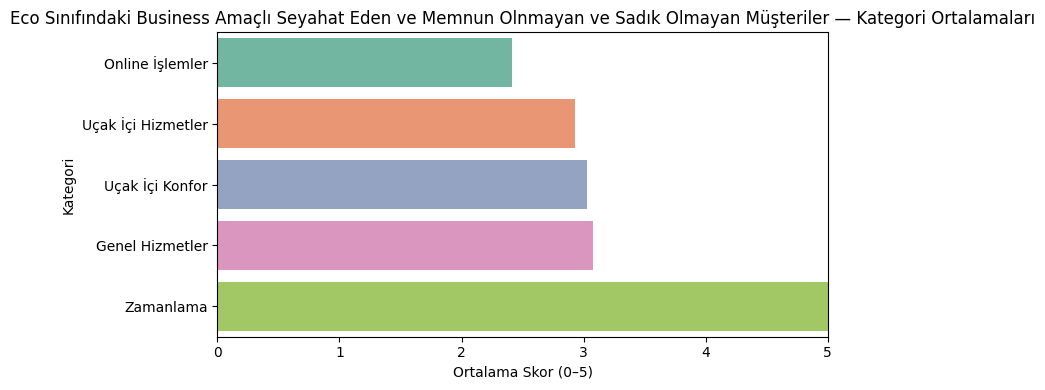

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------- #
# Kategori sütun grupları
# -------------------------------------------------------- #
general_cols  = ['Baggage handling', 'Checkin service', 'Gate location']
inflight_cols = ['Inflight wifi service', 'Inflight entertainment',
                 'On-board service', 'Inflight service', 'Cleanliness']
comfort_cols  = ['Seat comfort', 'Leg room service']
online_cols   = ['Online boarding', 'Ease of Online booking']
timing_cols   = ['Departure/Arrival time convenient',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

def plot_category_means(sub_df, title):
    """Verilen alt küme için toplu kategori ortalamalarını çizdirelim."""
    means = pd.Series({
        'Genel Hizmetler'   : sub_df[general_cols].mean(axis=1).mean(),
        'Uçak İçi Hizmetler': sub_df[inflight_cols].mean(axis=1).mean(),
        'Uçak İçi Konfor'   : sub_df[comfort_cols].mean(axis=1).mean(),
        'Online İşlemler'   : sub_df[online_cols].mean(axis=1).mean(),
        'Zamanlama'         : sub_df[timing_cols].mean(axis=1).mean()
    }).sort_values()                       # düşükten yükseğe

    plt.figure(figsize=(8, 4))
    sns.barplot(x=means.values, y=means.index, palette="Set2")
    plt.title(title)
    plt.xlabel("Ortalama Skor (0–5)")
    plt.ylabel("Kategori")
    plt.xlim(0, 5)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------- #
# 1) Business travel + Eco (+ memnun değil)
# -------------------------------------------------------- #
eco_bus_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Type of Travel'] == 'Business travel') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

plot_category_means(
    eco_bus_unhappy,
    "Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan Müşteriler — Kategori Ortalamaları"
)


# -------------------------------------------------------- #
# 2) Business travel + Eco + Disloyal + memnun değil
# -------------------------------------------------------- #
eco_bus_disloyal_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Type of Travel'] == 'Business travel') &
    (df['Customer Type'] == 'disloyal Customer') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

plot_category_means(
    eco_bus_disloyal_unhappy,
    "Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olnmayan ve Sadık Olmayan Müşteriler — Kategori Ortalamaları"
)

**ÖNEMLİ**

# **İKİNCİ SORUYA AYRINTILI BAKIŞ**

3.1. business amaçlı eco sınıfında seyahat eden insanlar neden memnun değil? ayrıntılı bakış

3.2. business amaçlı eco sınıfında seyahat eden ve sadık olmayan insanlar neden memnun değil? ayrıntılı bakış

* **GRAFİK 10: Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan Müşteriler - Online İşlem Ayrıntılı Puanlama**
  
* **GRAFİK 11: Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan Müşteriler - Uçak İçi Hizmet Ayrıntılı Puanlama**

* **GRAFİK 12: Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan ve Sadık Olmayan Müşteriler - Online İşlem Ayrıntılı Puanlama**

* **GRAFİK 13: Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan ve Sadık Olmayan Müşteriler - Uçak İçi Hizmet Ayrıntılı Puanlama**


  


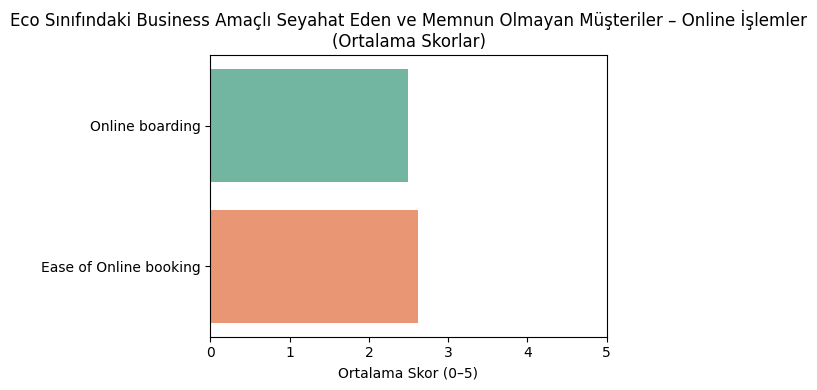

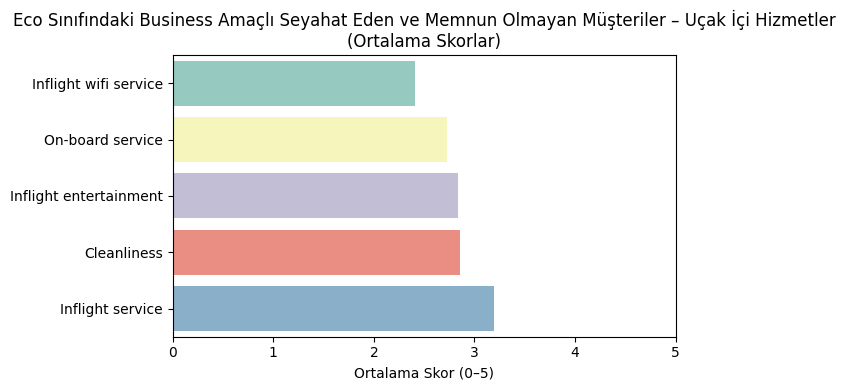

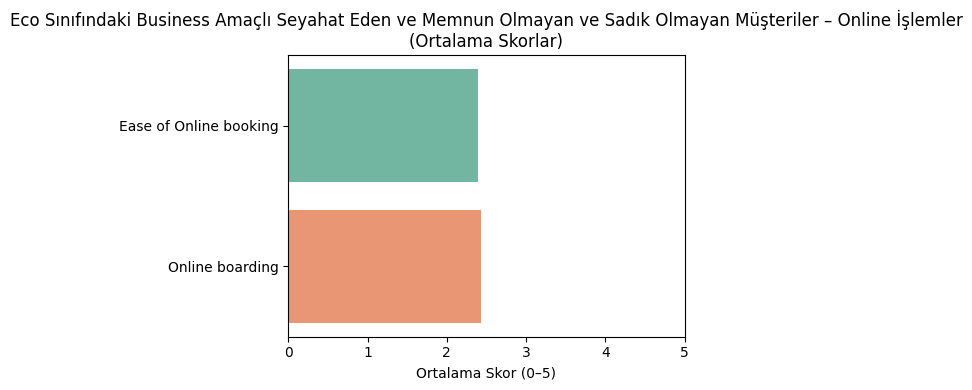

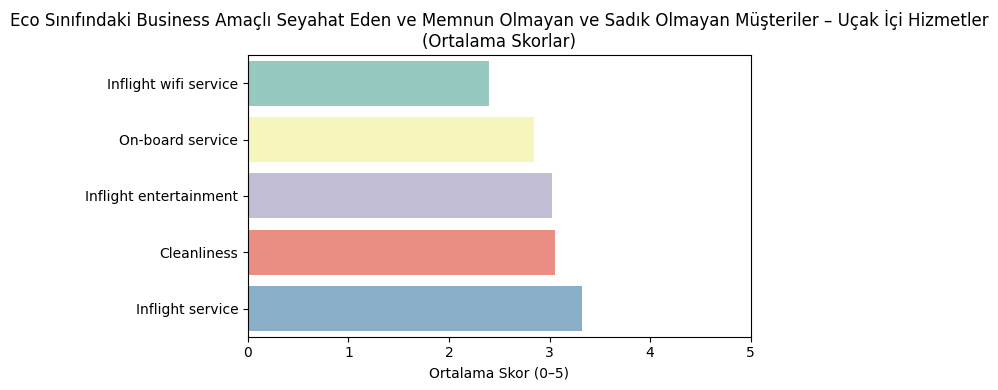

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------- #
# ALT DEĞİŞKEN LİSTELERİ
# ---------------------------------------------------- #
online_cols   = ['Online boarding', 'Ease of Online booking']
inflight_cols = ['Inflight wifi service', 'Inflight entertainment',
                 'On-board service', 'Inflight service', 'Cleanliness']

def plot_detailed_means(sub_df, title_prefix):
    """Alt değişkenlerin ortalama skorlarını bar grafiği olarak çizelim"""
    online_means   = sub_df[online_cols].mean().sort_values()
    inflight_means = sub_df[inflight_cols].mean().sort_values()

    # Online İşlemler
    plt.figure(figsize=(6, 4))
    sns.barplot(x=online_means.values, y=online_means.index, palette='Set2')
    plt.title(f'{title_prefix} – Online İşlemler\n(Ortalama Skorlar)')
    plt.xlabel('Ortalama Skor (0–5)'); plt.ylabel('')
    plt.xlim(0, 5); plt.tight_layout(); plt.show()

    # Uçak İçi Hizmetler
    plt.figure(figsize=(7, 4))
    sns.barplot(x=inflight_means.values, y=inflight_means.index, palette='Set3')
    plt.title(f'{title_prefix} – Uçak İçi Hizmetler\n(Ortalama Skorlar)')
    plt.xlabel('Ortalama Skor (0–5)'); plt.ylabel('')
    plt.xlim(0, 5); plt.tight_layout(); plt.show()


# ---------------------------------------------------- #
# Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan Müşteriler
# ---------------------------------------------------- #
eco_bus_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Type of Travel'] == 'Business travel') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

plot_detailed_means(
    eco_bus_unhappy,
    title_prefix='Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan Müşteriler'
)


# ---------------------------------------------------- #
# Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan ve Sadık Olmayan Müşteriler
# ---------------------------------------------------- #
eco_bus_disloyal_unhappy = df[
    (df['Class'] == 'Eco') &
    (df['Type of Travel'] == 'Business travel') &
    (df['Customer Type'] == 'disloyal Customer') &
    (df['satisfaction'] == 'neutral or dissatisfied')
].copy()

plot_detailed_means(
    eco_bus_disloyal_unhappy,
    title_prefix='Eco Sınıfındaki Business Amaçlı Seyahat Eden ve Memnun Olmayan ve Sadık Olmayan Müşteriler'
)

# **BONUS SORU: UÇUŞ MESAFESİ İLE HİZMET MEMNUNİYETSİZLİĞİNE KATLANABİLİRLİĞİN UÇUŞ TİPİ AYRIMINDA İNCELENMESİ**

* **GRAFİK 14: Uçuş Mesafesi ve Sadık Ama Memnun Olmayan Müşteriler**
* **GRAFİK 15: Uçuş Mesafesi ve Sadık Olmayan ve Memnun Olmayan Müşteriler**

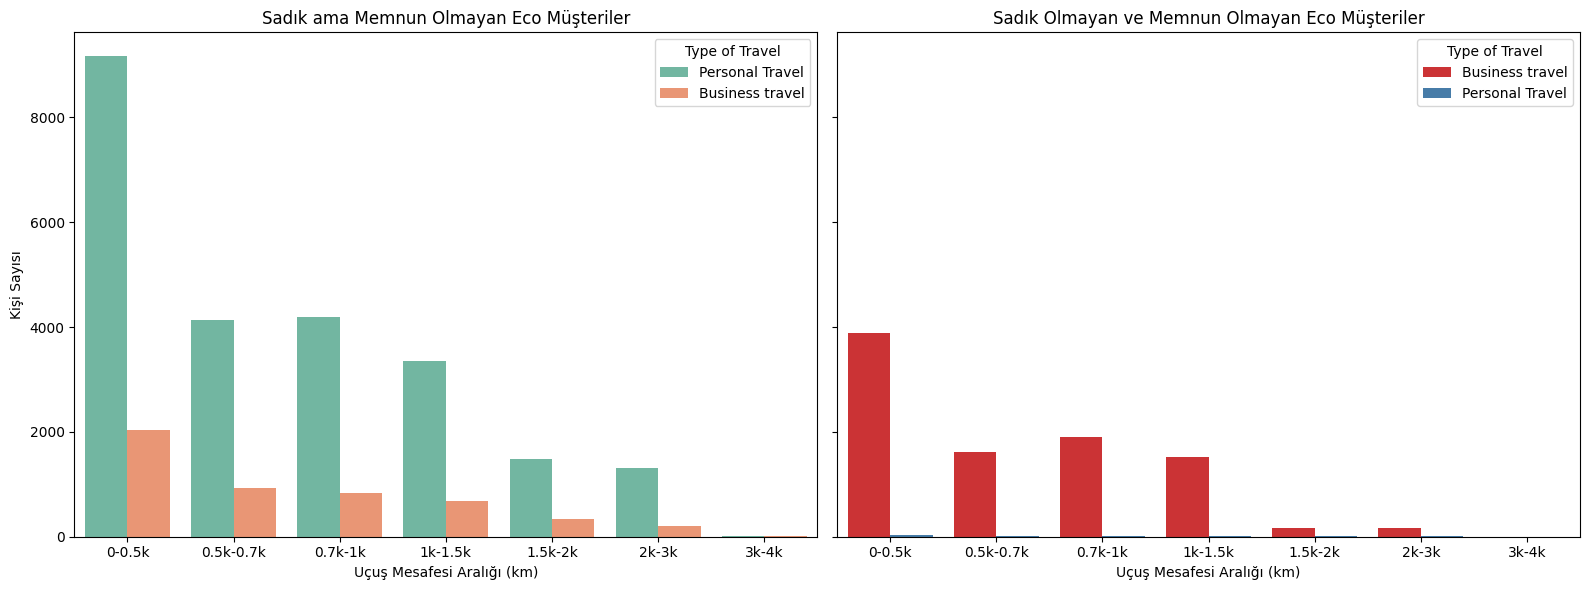

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ortak: Uçuş mesafesi grupları
bins   = [0, 500, 700, 1000, 1500, 2000, 3000, 4000]
labels = ['0-0.5k','0.5k-0.7k','0.7k-1k', '1k-1.5k', '1.5k-2k', '2k-3k','3k-4k']

# Sadık ama memnun olmayanlar
filtered_loyal = df[
    (df["Class"] == "Eco") &
    (df["Customer Type"] == "Loyal Customer") &
    (df["satisfaction"] == "neutral or dissatisfied")
].copy()

filtered_loyal['Flight Distance Group'] = pd.cut(filtered_loyal['Flight Distance'], bins=bins, labels=labels)

# Sadık olmayan ve memnun olmayanlar
filtered_disloyal = df[
    (df["Class"] == "Eco") &
    (df["Customer Type"] == "disloyal Customer") &
    (df["satisfaction"] == "neutral or dissatisfied")
].copy()

filtered_disloyal['Flight Distance Group'] = pd.cut(filtered_disloyal['Flight Distance'], bins=bins, labels=labels)


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Grafik 1: Sadık ama memnun olmayanlar
sns.countplot(
    data=filtered_loyal,
    x='Flight Distance Group',
    hue='Type of Travel',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title("Sadık ama Memnun Olmayan Eco Müşteriler")
axes[0].set_xlabel("Uçuş Mesafesi Aralığı (km)")
axes[0].set_ylabel("Kişi Sayısı")

# Grafik 2: Sadık olmayan ve memnun olmayanlar
sns.countplot(
    data=filtered_disloyal,
    x='Flight Distance Group',
    hue='Type of Travel',
    palette='Set1',
    ax=axes[1]
)
axes[1].set_title("Sadık Olmayan ve Memnun Olmayan Eco Müşteriler")
axes[1].set_xlabel("Uçuş Mesafesi Aralığı (km)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**ÖNEMLİ**

##### Bu son soruyu da, acaba kısa uçuşlarda mı memnuniyetsizliğe rağmen sadakat, başka açıdan bakıldığında katlanabilirlik, var diye merak ettim, fakat görüldüğü üzere zaten ilgili müşteri grubu kısa mesafeli uçuş yapmakta.

GRAFİK diyor ki, eco müşterilerinden memnun olmayanlar genellikle zaten kısa mesafeli uçuş yapıyor. ve bu müşterilerden sadık olanlar çok yüksek sayıda. sadık müşteriler de çoğunlukla seyahat amaçlı.

sadık olmayanlar daha az ve neredeyse tümü business amaçlı uçuş yapıyor.

# **ÖZETLE,**

Mesafe uzunluğu ayrımı yapılmaksızın (çünkü zaten çoğu uçuş kısa mesafeli),
eco sınıfındaki, özellikle de seyahat amaçlı uçan, müşteriler memnuniyetsiz olmasının yanı sıra sadık değil. Bu müşterilerin satın alımlarının sürdürülebilmesi için ve hali hazırda sadık ama memnun olmayan müşterilerin de memnuniyet oranlarının artırılarak yine sürdürülebilirliğin daha garanti altına alınması konusunda 5,6,7,8 numaralı grafiklerin kaydettikleri büyük önem arz ediyor. Kısaca diyebiliriz ki; online işlemler ve uçak içi genel hizmet -özellikle wifi- kalitesine yönelik çalışmalara ihtiyaç söz konusu.


